### INDIAN STARTUP ECOSYSTEM


# Project Description

We embark on a journey of discovery as we leverage our data analysis expertise to uncover the untapped potential within the Indian startup ecosystem. This project is designed to not only decode the numbers but to distill insights that will guide our team towards a successful foray into this dynamic market


# Scope of Work

Conduct a thorough exploration of datasets, dissecting funding patterns, sectoral nuances, and geographical hotspots in the Indian startup landscap Analyze funding received by startups in india from 2018 to 2021



# Hypotheses

H0 : There is no significant relationship between funding and the sector

H1 : There is a significant relationship between funding and the sector




 ## Analytical Questions
1. How has funding trends evolved between 2018 and 2021?
2. What is the relationship between the amount of funding and the stage of the company?
3. How does funding vary with the location of the start-ups
4. What are the most attractive sectors for investors?
5. Does the location of the company influence its sector?

   



## DATA EXPLORATION, DATA UNDERSTANDING AND  DATA ANALYSIS


In [90]:
#import the dotenv_values function from the dotenv package
import pyodbc    
from dotenv import dotenv_values    
import pandas as pd
import numpy as np
import warnings 

# for visualisation

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import scipy.stats as stats
from matplotlib.dates import YearLocator
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import re


warnings.filterwarnings('ignore')

In [3]:
#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

## 1.Loading and Inspection of Data

In [4]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server_name")
database = environment_variables.get("database_name")
username = environment_variables.get("Login")
password = environment_variables.get("password")

In [5]:
# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;"


In [6]:
#creating a connection
connection = pyodbc.connect(connection_string)

### DATA UNDERSTANDING


1. load in all the various dataset required for the analyse. Dataset is in various source platforms
2. check info for more information on each of the dataset and data type 
3. We will be concatenating the datasets and create one dataset source
4. check info with the new dataset 
5. assess the mean, std, percentile, count with describe
6. check for null values
7. Do an exploratory data analysis

### DEFINITION OF DATASET VARIABLE
| NAME              | DEFINITION
|:---:              |:---
| Company brand     | company's name
| Founded           | represents the year a company was started
| Headquaters       | the location of the business
| Sector            | the industry under which the companies are in 
| What it does      | overview of what the company does
| Founders          | the CEO or the person who started the company
| Investor          | a person who is investing into the company
| Amount            | the amount of funds received by the company 
| Stage             | the stage at which the company is in

#### DATA LOADING AND OVERVIEW

#### 1.1 Loading sql data

In [7]:
#2020 data
query = "SELECT * FROM dbo.LP1_startup_funding2020"
data_2020 = pd.read_sql(query, connection)
data_2020['year'] = 2020
#2021 data
query = "SELECT * FROM dbo.LP1_startup_funding2021"
data_2021 = pd.read_sql(query, connection)
data_2021['year'] = 2021

#### 1.2 Loading CSV data

In [8]:
#2019 data
data_2019=pd.read_csv("startup_funding2019.csv")
data_2019['year']= 2019
#2018 data
data_2018=pd.read_csv("startup_funding2018.csv")
data_2018['year']= 2018

## 2 Exploratory Data Analysis (E.D.A)

####  2.0 EDA FOR 2018 Dataset

In [9]:
data_2018.head(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company,year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018


In [10]:
## checking for number of columns and rows
print (data_2018.shape)
print(f"There are {data_2018.shape[0]} rows, and {data_2018.shape[1]} columns")

(526, 7)
There are 526 rows, and 7 columns


In [11]:
# checking for datatypes in the different columns
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
 6   year           526 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 28.9+ KB


In [12]:
# performing descriptive analysis
data_2018.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company Name,526,525,TheCollegeFever,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,526,405,—,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Round/Series,526,21,Seed,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,526,198,—,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,526,50,"Bangalore, Karnataka, India",102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
About Company,526,524,"TheCollegeFever is a hub for fun, fiesta and f...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,526.0,NaN,NaN,NaN,2018.0,0.0,2018.0,2018.0,2018.0,2018.0,2018.0


Findings
--> TheCollegeFever company was the most common company

-->Seed series was the most preffered

-->most companies were based in Bangalore location

In [13]:
## checking for duplicates
print("There are ",data_2018.duplicated().sum(),"duplicate(s)")

There are  1 duplicate(s)


In [14]:
## Checking for missing values
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
year             0
dtype: int64

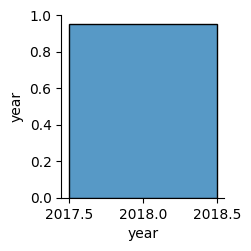

In [15]:
sns.pairplot(data_2018)

## 2.1 2019 dataset EDA

In [16]:
## preview of the data
data_2019.head(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [17]:
## checking for number of columns and rows
print (data_2019.shape)
print(f"There are {data_2019.shape[0]} rows, and {data_2019.shape[1]} columns")

(89, 10)
There are 89 rows, and 10 columns


In [18]:
## checking for duplicates
print("There are ",data_2019.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [19]:
## Checking for nulls
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
year              0
dtype: int64

In [21]:
## checking for datatypes in the different columns
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
 9   year           89 non-null     int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 7.1+ KB


In [22]:
# performing descriptive analysis
data_2019.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company/Brand,89,87,Kratikal,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,60.0,NaN,NaN,NaN,2014.533333,2.937003,2004.0,2013.0,2015.0,2016.25,2019.0
HeadQuarter,70,17,Bangalore,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,84,52,Edtech,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What it does,89,88,Online meat shop,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,86,85,"Vivek Gupta, Abhay Hanjura",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,89,86,Undisclosed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount($),89,50,Undisclosed,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,43,15,Series A,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,89.0,NaN,NaN,NaN,2019.0,0.0,2019.0,2019.0,2019.0,2019.0,2019.0


### Findings
--> Kratikal company was the most common company

--> Most companies had their headquarters based in Bangalore

--> Majority of the companies are involved in the Edtech sector 

###  2.2 E.D.A FOR 2020

In [23]:
## preview of the data
data_2020.head(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10,year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None,2020


In [24]:
## checking for number of columns and rows
print (data_2020.shape)
print(f"There are {data_2020.shape[0]} rows, and {data_2020.shape[1]} columns")

(1055, 11)
There are 1055 rows, and 11 columns


In [25]:
## checking for duplicates
print("There are ",data_2020.duplicated().sum(),"duplicate(s)")

There are  3 duplicate(s)


In [26]:
## Checking for nulls
data_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
year                0
dtype: int64

In [27]:
## checking for datatypes in the different columns
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
 10  year           1055 non-null   int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 90.8+ KB


In [28]:
# performing descriptive analysis
data_2020.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,1055,905,Nykaa,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,842.0,NaN,NaN,NaN,2015.36342,4.097909,1973.0,2014.0,2016.0,2018.0,2020.0
HeadQuarter,961,77,Bangalore,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1042,302,Fintech,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1055,990,Provides online learning classes,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1043,927,Falguni Nayar,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1017,848,Venture Catalysts,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,801.0,NaN,NaN,NaN,113042969.543071,2476634939.888347,12700.0,1000000.0,3000000.0,11000000.0,70000000000.0
Stage,591,42,Series A,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column10,2,2,Pre-Seed,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Findings 
--> Nykaa company was the most common company

--> Majority of the companies had their headquarter at Bangalore

--> The average Amount invested was 113042969.54

###  2.3 E.D.A FOR 2021 DATA

In [29]:
# preview of the dataset 
data_2021.head(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021


In [30]:
## checking for number of columns and rows
print (data_2021.shape)
print(f"There are {data_2021.shape[0]} rows, and {data_2021.shape[1]} columns")

(1209, 10)
There are 1209 rows, and 10 columns


In [31]:
## checking for duplicates
print("There are ",data_2021.duplicated().sum(),"duplicate(s)")

There are  19 duplicate(s)


In [32]:
## Checking for nulls
data_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
year               0
dtype: int64

In [33]:
## checking for datatypes in the different columns
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   year           1209 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 94.6+ KB


In [34]:
# performing descriptive analysis
data_2021.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,1209,1033,BharatPe,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founded,1208.0,NaN,NaN,NaN,2016.655629,4.517364,1963.0,2015.0,2018.0,2020.0,2021.0
HeadQuarter,1208,70,Bangalore,426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,1209,254,FinTech,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
What_it_does,1209,1143,BharatPe develops a QR code-based payment app ...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Founders,1205,1095,"Ashneer Grover, Shashvat Nakrani",7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investor,1147,937,Inflection Point Ventures,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,1206,278,$Undisclosed,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,781,31,Seed,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,1209.0,NaN,NaN,NaN,2021.0,0.0,2021.0,2021.0,2021.0,2021.0,2021.0


### Findings
--> BharatPe is the most common company

--> most companies invested in the FinTech sector

-->Majority of the companies were found in Bangalore

## 2.4 CONCATINATE DATA

In [35]:
#concatinating the data
def concat_dataframes(data_2021,data_2020,data_2019,data_2018):
    """
    Concatenates four dataframes along the row axis.
 
    Parameters:
    data (pandas.DataFrame): The first dataframe to concatenate.
    data1 (pandas.DataFrame): The second dataframe to concatenate.
    data2 (pandas.DataFrame): The third dataframe to concatenate.
    data3 (pandas.DataFrame): The fourth dataframe to concatenate.
 
    Returns:
    pandas.DataFrame: The concatenated dataframe.
    """
    # Rename columns to make them consistent across dataframes
    df1 = data_2021.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series'})
    df2 = data_2020.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series'})
    df3 = data_2019.rename(columns={'Company/Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What it does': 'about_company','Founders':'founders','Investor':'investor','Amount($)':'amount','Stage':'series'})
    df4 = data_2018.rename(columns={'Company Name': 'company_brand','Location': 'headquarter','Industry': 'sector','About Company': 'about_company','Amount':'amount','Round/Series':'series'})
 
    # Concatenate dataframes along the row axis
    result = pd.concat([df1, df2, df3,df4], axis=0)
 
    return result

In [36]:
df= concat_dataframes(data_2021,data_2020,data_2019,data_2018)
df.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year,column10
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021,NaN
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021,NaN
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021,NaN
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C,2021,NaN
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed,2021,NaN


In [103]:

# Specify the file path for the output CSV file
output_csv_file = "concatenated_data.csv"

# Save the concatenated DataFrame to a CSV file
df.to_csv(output_csv_file, index=False)

print(f"Concatenated data saved to {output_csv_file}")

Concatenated data saved to concatenated_data.csv


In [37]:
#overview of concatinated data(2018-2021)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2879 entries, 0 to 525
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   about_company  2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2622 non-null   object 
 8   series         1941 non-null   object 
 9   year           2879 non-null   int64  
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 269.9+ KB


In [38]:
df.shape

(2879, 11)

In [39]:
df.describe(include='all')

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year,column10
count,2879,2110.000000,2765,2861,2879,2334,2253,2622,1941,2879.000000,2
unique,2214,NaN,172,873,2691,1980,1777,774,75,NaN,2
top,BharatPe,NaN,Bangalore,FinTech,Provides online learning classes,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,—,Seed,NaN,Pre-Seed
freq,10,NaN,764,173,5,7,36,148,606,NaN,1
mean,NaN,2016.079621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.023619,NaN
std,NaN,4.368006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.086974,NaN
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN
75%,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,NaN


In [40]:
df.isna().sum()

company_brand       0
founded           769
headquarter       114
sector             18
about_company       0
founders          545
investor          626
amount            257
series            938
year                0
column10         2877
dtype: int64

In [41]:
df.duplicated().sum()

23

In [42]:
df.nunique()

company_brand    2214
founded            34
headquarter       172
sector            873
about_company    2691
founders         1980
investor         1777
amount            774
series             75
year                4
column10            2
dtype: int64

## Summary 



--> The combined dataset has 2879 rows and 10 columns

--> There is 10 columns for the 2020 dataset, 9 columns for the 2021 dataset , 9 columns for the 2019 dataset,6 columns for the 2018 dataset

--> The column founded is the only one with integer datatype

--> The 2020 dataset contains an addition of columns that appears to be extraneous that doesn't seem to serve any meaningfull purpose

NOTES
1. The data set has missing values which require cleaning.
2. We will be dropping column 10 since it is a duplicate of the series.
3. There are duplicates in our dataset which need to be dropped.
4. The column amount data type needs to be changed to float and also convert currency to USD.
5. There is a need of assessing the mean, std , percentile after cleaning.
6. conduct another EDA for column amount.

### Course of Action:

Missing Column Engineering for 2018:

We will address the absence of certain columns in the 2018 dataset by employing data engineering techniques to create and populate the missing columns, ensuring a comprehensive and consistent dataset.
Column Name Standardization:

To establish uniformity and coherence across all datasets, we will embark on a column renaming process for the 2018 and 2019 datasets. This action aims to align the naming conventions with those observed in the 2020 and 2021 datasets, facilitating seamless data integration and analysis.
Extraneous Column Removal in 2020:

The redundant column identified in the 2020 dataset will be removed, streamlining the dataset and eliminating unnecessary elements that do not contribute to the overall analysis objectives.
These actions collectively enhance the integrity, consistency, and completeness of the dataset, paving the way for a more robust and coherent analytical process. ical process.

BUSINESS QUESTIONS
1. Which industries/sectors have the largest funding?
2. Who are the top ten competitors with the largest funding?
3. Who are the top investors?(frequency)
4. Which year was funds allocated the most?
5. Which is the largest headquaters for startup business in India?
6. What is the average funds granted to startups?

## 3 DATA PREPARATION AND CLEANING 

### 3.0 Convert Indian Rupee values in the 2018 data to dollars

In [49]:
# Replace '₹', commas, '—', and "''" in 'Amount' column
data_2018['Amount'] = data_2018['Amount'].str.replace(',', '').str.replace('—', '').str.replace("''",'').replace('', np.nan)

# Conditionally apply multiplication only where '₹' is present
mask = data_2018['Amount'].str.contains('₹', na=False)
data_2018.loc[mask, 'Amount'] = data_2018.loc[mask, 'Amount'].str.replace('₹', '').astype(float) * 0.0146

In [43]:
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

In [44]:
df= df.reset_index(drop=True)

In [45]:
df.tail()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year,column10
2874,Udaan,NaN,"Bangalore, Karnataka, India","B2B, Business Development, Internet, Marketplace","Udaan is a B2B trade platform, designed specifically for small and medium businesses in India.",NaN,NaN,225000000,Series C,2018,NaN
2875,Happyeasygo Group,NaN,"Haryana, Haryana, India","Tourism, Travel",HappyEasyGo is an online travel domain.,NaN,NaN,—,Series A,2018,NaN
2876,Mombay,NaN,"Mumbai, Maharashtra, India","Food and Beverage, Food Delivery, Internet",Mombay is a unique opportunity for housewives to start household food business and avail everyone with their homemade healthy dishes.,NaN,NaN,7500,Seed,2018,NaN
2877,Droni Tech,NaN,"Mumbai, Maharashtra, India",Information Technology,Droni Tech manufacture UAVs and develop software to service a range of industry requirements.,NaN,NaN,"₹35,000,000",Seed,2018,NaN
2878,Netmeds,NaN,"Chennai, Tamil Nadu, India","Biotechnology, Health Care, Pharmaceutical",Welcome to India's most convenient pharmacy!,NaN,NaN,35000000,Series C,2018,NaN


In [46]:
#Drop the extreneous column 10
df.drop('column10', axis=1, inplace= True)

### 3.1 CLEANING AMOUNT COLUMN

Notes

Remove all currency signs

Remove all other umwanted characters, words and symbols

Fill the nulls uning interpolate method

Convert the column from object to float

In [56]:
df['amount']=df['amount'].replace('\$','',regex=True)
df['amount']=df['amount'].replace(['Undisclosed','undisclosed',None],np.NAN)
df['headquarter']=df['headquarter'].str.strip('\t#REF!')
df['amount']=df['amount'].replace('\,','',regex=True)
df['amount']=df['amount'].replace(",","")

In [54]:
# fix index 242
df.at[242, 'headquarter'] = None
df.at[242, 'sector'] = 'Pharmaceuticals'
df.at[242, 'founders'] = 'Varun Khanna'
df.at[242, 'investor'] = 'Morgan Stanley Private Equity Asia'
df.at[242, 'amount'] = '22000000'
df.at[242, 'series'] = 'Series C'
df.at[242, 'about_company'] = 'Development and Manufacturing'

# drop the duplicate row
df = df.drop(256, axis=0, errors='ignore')

# fix index 1148
df.at[1148, 'sector'] = 'Logistics'
df.at[1148, 'founders'] ='Basant Kumar' 
df.at[1148, 'investor'] =None
df.at[1148, 'amount'] = 1000000
df.at[1148, 'series'] = 'Seed'
 
# fix index 257
df.at[257, 'sector'] = 'Transport'
df.at[257, 'founders'] ='Anshuman Maheshwary'
df.at[257, 'investor'] =None
df.at[257, 'amount'] = 5000000
df.at[257, 'series'] = 'Seed'

# fix index 98
df.at[98, 'sector'] = 'Computer Games'
df.at[98, 'founders'] ='Pritesh Kumar'
df.at[98, 'investor'] =None
df.at[98, 'amount'] = 1200000
df.at[98, 'series'] = 'Seed'

# drop the duplicate column
df = df.drop(111, axis=0, errors='ignore')

# fix index 677
df.at[677, 'amount'] = 1000000
df.at[677, 'series'] = 'Angel'

# fix index 545
df.at[545, 'investor'] =None
df.at[545, 'amount'] = 1000000
df.at[545, 'series'] = 'Pre-series A'

# fix index 538
df.at[538, 'investor'] =None
df.at[538, 'amount'] = 300000
df.at[538, 'series'] = 'Pre-Seed'

# fix index 551
df.at[551,'amount']=300000
df.at[551,'series']=None

# fix index 674
df.at[674,'amount']=6000000
df.at[674,'series']=None

# fix index 2531
df.at[2531,'amount']=None
df.at[2531,'series']=None

In [58]:
# fill nulll values with 0
df['amount'].fillna(0, inplace=True)

In [59]:
df['amount'].isna().sum()

0

### 3.2 **Cleaning year column** 

**Notes**  


- Convert data type to period

In [61]:
# Convert the data_year column to date
df['year']=pd.to_datetime(df['year'], format='%Y')
# df['year']=df['year'].dt.to_period('y')
df['founded']=pd.to_datetime(df['founded']).dt.year

In [62]:
# check for nulls and duplicated
print(f"There are {df['year'].isna().sum()} Null values in the 'year' column")

There are 0 Null values in the 'year' column


In [63]:
df['year'].info()

<class 'pandas.core.series.Series'>
Index: 2877 entries, 0 to 2878
Series name: year
Non-Null Count  Dtype         
--------------  -----         
2877 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 109.5 KB


##  3.3 **Cleaning 'founded' column**

**Notes**  
- There are 769 null values in the 'founded' column.  

- Since dropping the nulls will lead to a significant loss of our data, Backward fill will be used to fill the null values

**COURSE OF ACTION**

- We will be cleaning the missing values by fill them using interpolate method which is suitable for time series data  

- We will also be converting the data type from float to datetime for purpose of our analysis.

In [64]:
# Fill the nulls
df["founded"].interpolate(method='linear',inplace= True)

print(f"There are {df['founded'].isna().sum()} missing values")

There are 0 missing values


In [65]:
# Convert to datetime
df['founded'] = pd.to_datetime(df['founded'], format='%Y')

# Convert to period
df['founded'] = df['founded'].dt.to_period('Y')

In [66]:
df['founded'].info()

<class 'pandas.core.series.Series'>
Index: 2877 entries, 0 to 2878
Series name: founded
Non-Null Count  Dtype        
--------------  -----        
2877 non-null   period[A-DEC]
dtypes: period[A-DEC](1)
memory usage: 109.5 KB


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   company_brand  2877 non-null   object        
 1   founded        2877 non-null   period[A-DEC] 
 2   headquarter    2762 non-null   object        
 3   sector         2859 non-null   object        
 4   about_company  2877 non-null   object        
 5   founders       2332 non-null   object        
 6   investor       2246 non-null   object        
 7   amount         2877 non-null   object        
 8   series         1941 non-null   object        
 9   year           2877 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(8), period[A-DEC](1)
memory usage: 311.8+ KB


##  3.4 **Cleaning the 'founders' column**

In [68]:
# Remove unwanted characters
df['founders'] = df['founders'].replace(['...', np.nan], np.NaN)

# Check the number of NaN values in the 'founders' column
nan_count = df['founders'].isna().sum()

print(nan_count)

545


In [69]:
df['founders'].info()

<class 'pandas.core.series.Series'>
Index: 2877 entries, 0 to 2878
Series name: founders
Non-Null Count  Dtype 
--------------  ----- 
2332 non-null   object
dtypes: object(1)
memory usage: 109.5+ KB


## 3.5  **Cleaning Stage column**

Startups start with pre-seed, progress through seed, Series A, Series B, etc., securing resources for development and strategies. Additional rounds like Series C or D may follow. External funding at each stage fuels growth toward the venture's full potential

link: https://www.startupindia.gov.in/content/sih/en/funding.html

| Stages          | Description                                                           |
|-----------------|-----------------------------------------------------------------------|
| Others          | Miscellaneous phases or unique development activities.                 |
| Early Traction  | Gaining initial traction, attracting early adopters, and refining based on feedback. |
| Validation      | Validating the business model, product-market fit, and scalability through research and feedback. |
| Ideation        | Brainstorming and developing business concepts, defining value propositions, and outlining plans. |
| Scaling         | Expanding operations, customer base, and market reach for rapid growth. |
| Exit Option     | Considering exit strategies such as mergers, acquisitions, or IPOs.     |

In [70]:
def categorize_series(df):
    # Convert 'series' column to lowercase for case-insensitive operations
    df['series'] = df['series'].astype(str).str.lower()

    # Step 1: Replace Exit Option stages
    df.loc[df['series'].str.contains('post ipo|post series a', regex=True, case=False), 'series'] = 'exit option'

    # Step 2: Replace Scaling stages
    df.loc[df['series'].str.contains('mid series|series b\+|private equity|venture - series unknown', regex=True, case=False), 'series'] = 'scaling'

    # Step 3: Replace Early Traction stages
    df.loc[df['series'].str.contains('series [abcdefghi]|early seed', regex=True, case=False), 'series'] = 'early traction'

    # Step 4: Replace Validation stages
    df.loc[df['series'].str.contains('seed|angel', regex=True, case=False), 'series'] = 'validation'

    # Step 5: Replace Ideation stages
    df.loc[df['series'].str.contains('pre[ -]?seed', regex=True, case=False), 'series'] = 'ideation'

    # Step 6: Replace Others
    df.loc[df['series'].str.contains('pre[ -]?series|bridge|corporate round|debt|undisclosed|secondary market|non-equity assistance|grant|funding round|nan', na=False, regex=True, case=False), 'series'] = 'others'

    # Step 7: Catch-all replacement for any remaining uncategorized values
    df.loc[~df['series'].isin(['others', 'early traction', 'validation', 'ideation', 'scaling', 'exit option']), 'series'] = 'others'

    return df

# Apply the categorization function to your existing DataFrame
df = categorize_series(df)

# Print the unique values after categorization
print(df['series'].unique())

['early traction' 'others' 'validation' 'scaling' 'exit option']


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   company_brand  2877 non-null   object        
 1   founded        2877 non-null   period[A-DEC] 
 2   headquarter    2762 non-null   object        
 3   sector         2859 non-null   object        
 4   about_company  2877 non-null   object        
 5   founders       2332 non-null   object        
 6   investor       2246 non-null   object        
 7   amount         2877 non-null   object        
 8   series         2877 non-null   object        
 9   year           2877 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(8), period[A-DEC](1)
memory usage: 311.8+ KB


In [73]:
# fix index 551
df.at[551,'amount']=300000
df.at[551,'series']=None

# fix index 674
df.at[674,'amount']=6000000
df.at[674,'series']=None

# fix index 2531
df.at[2531,'amount']=None
df.at[2531,'series']=None

In [74]:
# strip off characters 
df['series'] = df['series'].str.strip('\t#REF!')

## 3.6  **Cleaning the Sector Column**

In [75]:
# Get the first sentence of every list
df['sector']=df['sector'].str.split(",").str[0]

In [76]:
def categorize_sector(df):
    # Replace Artificial Intelligence sectors
    df['sector'] = df['sector'].replace(['AI startup', 'AI Chatbot', 'AI Company', 'AI platform', 'AI Platform', 'AI Startup', 'Artificial Intelligence'], 'Artificial Intelligence')
    
    # Replace Education Technology sectors
    df['sector'] = df['sector'].replace(['EdTech', 'EdTech Startup', 'EdtTech', 'Edtech'], 'Education Technology')
    
    # Replace Business-to-Business E-commerce sectors
    df['sector'] = df['sector'].replace(['B2B E-commerce', 'E-commerce', 'B2B Ecommerce', 'Commerce', 'B2B marketplace', 'B2B Marketplace'], 'Business-to-Business E-commerce')
    
    # Replace Fintech sector
    df['sector'] = df['sector'].replace(['FinTech'], 'Fintech')
    
    # Replace Home Services sector
    df['sector'] = df['sector'].replace(['Home services'], 'Home Services')
    
    # Replace Healthcare sectors
    df['sector'] = df['sector'].replace(['HealthTech', 'Healthtech', 'Healtcare', 'HeathTech', 'Alternative Medicine', 'Health care', 'Helathcare', 'Healthcare', 'Health', 'Hospital & Health Care', 'Heathcare'], 'Healthcare')
    
    # Replace Technology Startup sector
    df['sector'] = df['sector'].replace(['Tech Startup', 'Tech startup', 'IT startup', 'Technology Startup'], 'Technology Startup')
    
    # Replace Business-to-Business Services sector
    df['sector'] = df['sector'].replace(['B2B service'], 'Business-to-Business Services')
    
    # Replace Renewable Energy sector
    df['sector'] = df['sector'].replace(['Renewable Energy'], 'Renewable Energy')
    
    # Replace Electronics sector
    df['sector'] = df['sector'].replace(['Electronics'], 'Electronics')
    
    # Replace Food and Beverages sectors
    df['sector'] = df['sector'].replace(['Food & Beverages', 'Food and Beverages', 'Food', 'Food Production', 'Food Industry', 'Food tech', 'Foodtech', 'FoodTech', 'Food Startup', 'Food & tech', 'Food diet', 'Food Processing', 'Food and Beverage', 'Food delivery', 'Food Delivery', 'Food & Logistics', 'Food devlivery', 'QSR startup'], 'Food and Beverages')
    
    # Replace Aerospace sectors
    df['sector'] = df['sector'].replace(['Aeorspace', 'Aerospace', 'Aviation', 'Aviation & Aerospace', 'Aero company'], 'Aerospace')
    
    # Replace Deep Technology sector
    df['sector'] = df['sector'].replace(['Deep Tech', 'Deeptech'], 'Deep Technology')
    
    # Replace Dating Services sector
    df['sector'] = df['sector'].replace(['Dating', 'Dating app'], 'Dating Services')
    
    # Replace Gaming sector
    df['sector'] = df['sector'].replace(['Gaming', 'Computer Games', 'Mobile Games', 'Games', 'E-Sports', 'Gaming startup'], 'Gaming')
    
    # Replace Robotics sector
    df['sector'] = df['sector'].replace(['Robotics', 'Robotics & AI'], 'Robotics')
    
    # Replace Retail sector
    df['sector'] = df['sector'].replace(['Retail', 'Reatil startup', 'Retail Startup', 'Retail Tech'], 'Retail')
    
    # Replace Oil and Energy sector
    df['sector'] = df['sector'].replace(['Oil and Energy', 'Oil & Energy'], 'Oil and Energy')
    
    # Replace Agricultural Technology sectors
    df['sector'] = df['sector'].replace(['AgriTech', 'Agritech', 'Agritech startup', 'AgTech', 'Agri tech', 'B2B Agritech', 'Agricultural Technology'], 'Agricultural Technology')
    
    # Replace Telecommunications sector
    df['sector'] = df['sector'].replace(['Telecommuncation', 'Telecommunication', 'Telecommunications'], 'Telecommunications')
    
    # Replace Dairy sector
    df['sector'] = df['sector'].replace(['Milk startup', 'Dairy startup', 'Dairy'], 'Dairy')
    
    # Replace Information Technology sectors
    df['sector'] = df['sector'].replace(['IT', 'Information Technology', 'Information Technology & Services', 'Information Technology Company', 'Information Technology and Services', 'IT company'], 'Information Technology')
    
    # Replace Logistics and Supply Chain sector
    df['sector'] = df['sector'].replace(['Logistics', 'Logistics & Supply Chain', 'Logistics and Supply Chain'], 'Logistics and Supply Chain')
    
    # Replace Hospitality sector
    df['sector'] = df['sector'].replace(['Hospitality'], 'Hospitality')
    
    # Replace Fashion and Lifestyle sectors
    df['sector'] = df['sector'].replace(['Fashion', 'Fashion & Lifestyle', 'Fashion and lifestyle', 'Fashion startup', 'Fashion Tech', 'Apparel & Fashion', 'Apparel and Fashion', 'Clothing', 'D2C Fashion', 'D2C jewellery'], 'Fashion and Lifestyle')
    
    # Replace Marketing and Advertising sectors
    df['sector'] = df['sector'].replace(['Marketing', 'Marketing & Advertising', 'Marketing and Advertising', 'MarTech', 'Marketing Technology', 'Advertisement', 'Advertising', 'Marketing company', 'Marketing startup'], 'Marketing and Advertising')
    
    # Replace Transportation and Mobility sectors
    df['sector'] = df['sector'].replace(['Transportation', 'Transport', 'Mobility', 'Mobility/Transport', 'Mobility tech', 'Auto-tech', 'Logitech', 'Transport & Rentals', 'Transport Automation', 'Transportation-as-a-Service Startup', 'TaaS startup', 'Automotive and Rentals', 'IoT/Automobile', 'Automobile Technology', 'Mobility', 'Last Mile Transportation', 'Micro-mobiity'], 'Transportation and Mobility')
    
    # Replace Legal Technology sector
    df['sector'] = df['sector'].replace(['LegalTech', 'Legaltech', 'Legal Services', 'Legal tech', 'Legaltech'], 'Legal Technology')
    
    # Replace Automotive sectors
    df['sector'] = df['sector'].replace(['Automotive', 'Automobile', 'Automotive Startup', 'Automotive company', 'Car Trade', 'Automotive tech', 'Vehicle repair startup', 'Car Service', 'Luxury car startup'], 'Automotive')
    
    # Replace Software-as-a-Service sectors
    df['sector'] = df['sector'].replace(['SaaS startup', 'SaaS', 'SaaS platform', 'Software-as-a-Service', 'Software-as-a-Service Platform', 'Software-as-a-Service Startup', 'SaaS\xa0\xa0startup'], 'Software-as-a-Service')
    
    # Replace Fantasy Sports sector
    df['sector'] = df['sector'].replace(['Fantasy sports', 'Fantasy Sports'], 'Fantasy Sports')
    
    # Replace Video sectors
    df['sector'] = df['sector'].replace(['Video communication', 'Video platform', 'Video', 'Video sharing platform', 'Video streaming platform', 'Video personalization'], 'Video')
    
    # Replace Social Media sectors
    df['sector'] = df['sector'].replace(['Social Media', 'Social network', 'Social Networking', 'Social commerce', 'Social community', 'Social Network', 'Social e-commerce', 'Social media', 'Social platform', 'Social audio'], 'Social Media')
    
    # Replace Skills Development and Professional Training sectors
    df['sector'] = df['sector'].replace(['Skill development', 'Skills Development', 'Professional Training & Coaching', 'Professional Training and Coaching'], 'Skills Development and Professional Training')
    
    # Replace Rental Services sectors
    df['sector'] = df['sector'].replace(['Rental', 'Rental Services', 'Rental space', 'Bike Rental', 'Furniture Rental'], 'Rental Services')
    
    # Replace Recruitment and Staffing sectors
    df['sector'] = df['sector'].replace(['Recruitment', 'Job discovery platform', 'Job portal', 'Staffing & Recruiting', 'Staffing and Recruiting', 'Recruitment startup'], 'Recruitment and Staffing')
    
    # Replace Sports and Sports Technology sectors
    df['sector'] = df['sector'].replace(['Sports', 'SportsTech', 'Sports Technology', 'sports', 'Sports startup'], 'Sports and Sports Technology')
    
    # Replace Consumer Goods and Services sectors
    df['sector'] = df['sector'].replace(['Consumer Goods', 'Consumer goods', 'Consumer software', 'Consumer service', 'Consumer Services', 'Consumer', 'Consumer Applications', 'Consumer appliances', 'Consumer Electronics'], 'Consumer Goods and Services')
    
    # Replace Human Resources and HR Technology sectors
    df['sector'] = df['sector'].replace(['HRTech', 'HR Tech', 'HR Tech startup', 'Human Resources', 'Human Resources Technology', 'HRTech', 'HR tech', 'HR'], 'Human Resources and HR Technology')
    
    # Replace Wine and Spirits sector
    df['sector'] = df['sector'].replace(['Wine & Spirits'], 'Wine and Spirits')
    
    # Replace Mechanical and Industrial Engineering sector
    df['sector'] = df['sector'].replace(['Mechanical & Industrial Engineering', 'Mechanical and Industrial Engineering', 'Mechanical Or Industrial Engineering'], 'Mechanical and Industrial Engineering')
    
    # Replace Spirituality sector
    df['sector'] = df['sector'].replace(['Spiritual', 'Linguistic Spiritual'], 'Spirituality')
    
    # Replace Financial Services sectors
    df['sector'] = df['sector'].replace(['Financial Services', 'Banking', 'Capital Markets', 'Finance', 'Finance company', 'Investment Banking', 'Investment Management', 'Finance', 'Finance company', 'Financial Technology', 'FinTech', 'Digital mortgage', 'Online financial service', 'Online credit management startup', 'Trading platform', 'Virtual Banking'], 'Financial Services')
    
    # Replace Industrial Automation sector
    df['sector'] = df['sector'].replace(['Industrial Automation'], 'Industrial Automation')
    
    # Replace Internet of Things sectors
    df['sector'] = df['sector'].replace(['IoT', 'Internet of Things', 'IoT platform', 'IoT startup', 'Internet of Things Platform', 'Internet of Things Startup'], 'Internet of Things')
    
    # Replace Computer Software sectors
    df['sector'] = df['sector'].replace(['Computer software', 'Computer Software', 'Software', 'Software company', 'Software Startup'], 'Computer Software')
    
    # Replace Furniture and Home Decor sectors
    df['sector'] = df['sector'].replace(['Furniture', 'Home Decor', 'Interior Design'], 'Furniture and Home Decor')
    
    # Replace Location Analytics sector
    df['sector'] = df['sector'].replace(['Location Analytics'], 'Location Analytics')
    
    # Replace Media and Entertainment sectors
    df['sector'] = df['sector'].replace(['Media', 'Online Media', 'Podcast', 'Podcasting', 'Content publishing', 'Publication', 'Digital Media', 'Media and Entertainment', 'Broadcasting', 'News', 'Digital Entertainment', 'Media Tech', 'Visual Media', 'Online Portals', 'Content creation', 'Content Management', 'Content Marktplace'], 'Media and Entertainment')
    
    # Replace Consumer Electronics sector
    df['sector'] = df['sector'].replace(['Consumer Electronics'], 'Consumer Electronics')
    
    # Replace Tobacco sector
    df['sector'] = df['sector'].replace(['Tobacco'], 'Tobacco')
    
    # Replace Insurance sectors
    df['sector'] = df['sector'].replace(['Insuretech', 'Insurance Technology', 'Insurtech', 'InsureTech', 'Insurance'], 'Insurance')
    
    # Replace Machine Learning Operations sector
    df['sector'] = df['sector'].replace(['MLOps platform'], 'Machine Learning Operations')
    
    # Replace Venture Capital sectors
    df['sector'] = df['sector'].replace(['Venture Capital', 'Venture Capital & Private Equity', 'Venture Capital and Private Equity', 'Venture capitalist'], 'Venture Capital')
    
    # Replace Pet Care and Veterinary Services sectors
    df['sector'] = df['sector'].replace(['Pet care', 'Veterinary', 'Veterinary Services'], 'Pet Care and Veterinary Services')
    
    # Replace Drone Technology sectors
    df['sector'] = df['sector'].replace(['Drone', 'Drone Technology'], 'Drone Technology')
    
    # Replace Wholesale sector
    df['sector'] = df['sector'].replace(['Wholesale'], 'Wholesale')
    
    # Replace Construction and Construction Technology sectors
    df['sector'] = df['sector'].replace(['Construction', 'Construction tech'], 'Construction and Construction Technology')
    
    # Replace E-learning and Education Management sectors
    df['sector'] = df['sector'].replace(['E-learning', 'E-learning', 'Education Management'], 'E-learning and Education Management')
    
    # Replace Over-the-Top Media Services sector
    df['sector'] = df['sector'].replace(['OTT', 'Over-the-Top Media Services'], 'Over-the-Top Media Services')
    
    # Replace Computer and Network Security sectors
    df['sector'] = df['sector'].replace(['Computer & Network Security', 'Computer and Network Security', 'Cybersecurity'], 'Computer and Network Security')
    
    # Replace Social Networking and Community Platforms sectors
    df['sector'] = df['sector'].replace(['Social network', 'Social Networking', 'Social Network', 'Social community', 'Social platform'], 'Social Networking and Community Platforms')
    
    # Replace Music and Music Streaming sectors
    df['sector'] = df['sector'].replace(['Music', 'Music Streaming'], 'Music and Music Streaming')
    
    # Replace Hauz Khas sector
    df['sector'] = df['sector'].replace(['Hauz Khas'], 'Hauz Khas')
    
    # Replace Pharmaceuticals sectors
    df['sector'] = df['sector'].replace(['Pharmaceuticals', 'Pharmaceutical', 'Pharma', 'Biopharma', 'Pharmaceuticals'], 'Pharmaceuticals')
    
    # Replace Cosmetics, Personal Care, and Beauty Products sectors
    df['sector'] = df['sector'].replace(['Cosmetics', 'Beauty products', 'Personal Care', 'Beauty & wellness', 'Personal care startup', 'Skincare startup'], 'Cosmetics, Personal Care, and Beauty Products')
    
    # Replace Real Estate and Property Technology sectors
    df['sector'] = df['sector'].replace(['Real Estate', 'Real estate', 'Commercial Real Estate', 'Housing Marketplace', 'Proptech', 'Property Technology'], 'Real Estate and Property Technology')
    
    # Replace Digital Platforms sector
    df['sector'] = df['sector'].replace(['Digital platform', 'Digital Platform'], 'Digital Platforms')
    
    # Replace NFT and Non-Fungible Tokens sectors
    df['sector'] = df['sector'].replace(['NFT Marketplace', 'Non-Fungible Token Marketplace', 'NFT', 'Non-Fungible Tokens'], 'NFT and Non-Fungible Tokens')
    
    # Replace Space Technology and Defense sectors
    df['sector'] = df['sector'].replace(['SpaceTech', 'Spacetech', 'Space Technology', 'Defense & Space'], 'Space Technology and Defense')
    
    # Replace Fishery sector
    df['sector'] = df['sector'].replace(['Fishery'], 'Fishery')
            
    # Replace Renewable Energy, Environmental Services, and Clean Technology sectors
    df['sector'] = df['sector'].replace(['Renewables & Environment', 'Renewable Energy and Environmental Services', 'Environmental Services', 'Environmental service', 'Clean Technology', 'CleanTech', 'Pollution control equiptment'], 'Renewable Energy, Environmental Services, and Clean Technology')
    
    # Replace Online Storytelling sector
    df['sector'] = df['sector'].replace(['Online storytelling'], 'Online Storytelling')
    
    # Replace Customer Relationship Management sector
    df['sector'] = df['sector'].replace(['CRM', 'Customer Relationship Management'], 'Customer Relationship Management')
    
    # Replace Nutrition and Nutrition Technology sectors
    df['sector'] = df['sector'].replace(['Nutrition', 'Nutrition sector', 'Nutrition tech', 'Nutrition Tech', 'Food & Nutrition'], 'Nutrition and Nutrition Technology')
    
    # Replace Direct-to-Consumer sectors
    df['sector'] = df['sector'].replace(['D2C', 'Direct-to-Consumer', 'D2C Business', 'D2C startup', 'D2C Fashion', 'D2C jewellery'], 'Direct-to-Consumer')
    
    # Replace Innovation Management sector
    df['sector'] = df['sector'].replace(['Innovation Management', 'Innovation management'], 'Innovation Management')
    
    # Replace Community Platforms and Communities sectors
    df['sector'] = df['sector'].replace(['Community platform', 'Community', 'Communities'], 'Community Platforms and Communities')
    
    # Replace Networking and Networking Platforms sectors
    df['sector'] = df['sector'].replace(['Networking', 'Networking platform'], 'Networking and Networking Platforms')
    
    # Replace Augmented Reality and AR/VR sectors
    df['sector'] = df['sector'].replace(['AR startup', 'Augmented Reality Startup', 'AR platform', 'Augmented reality', 'Augmented Reality', 'AR/VR', 'AR/VR startup'], 'Augmented Reality and AR/VR')
    
    # Replace Content sectors
    df['sector'] = df['sector'].replace(['Content publishing', 'Content commerce', 'Content creation', 'Content Management', 'Content Marktplace'], 'Content')
    
    # Replace Rental Space sector
    df['sector'] = df['sector'].replace(['Rental space'], 'Rental Space')
    
    # Replace Tourism sector
    df['sector'] = df['sector'].replace(['Tourism'], 'Tourism')
    
    # Replace Femtech sector
    df['sector'] = df['sector'].replace(['FemTech', 'Femtech'], 'Femtech')
    
    # Replace Cultural sector
    df['sector'] = df['sector'].replace(['Cultural'], 'Cultural')
    
    # Replace Co-working sectors
    df['sector'] = df['sector'].replace(['Co-working', 'Co-working Startup', 'Coworking'], 'Co-working')
    
    # Replace Supply Chain and Logistics sectors
    df['sector'] = df['sector'].replace(['Supply chain platform', 'Supply Chain Platform', 'Logistics & Supply Chain', 'Logistics and Supply Chain', 'B2B Supply Chain'], 'Supply Chain and Logistics')
    
    # Replace Cryptocurrency sectors
    df['sector'] = df['sector'].replace(['Crypto', 'Cryptocurrency'], 'Cryptocurrency')
    
    # Replace Clothing sector
    df['sector'] = df['sector'].replace(['Clothing'], 'Clothing')
    
    # Replace Analytics and Data Science sectors
    df['sector'] = df['sector'].replace(['Analytics', 'Location Analytics', 'Data Analytics', 'Data Science', 'Data Intelligence'], 'Analytics and Data Science')
    
    # Replace Internet of Things Platform sector
    df['sector'] = df['sector'].replace(['IoT platform', 'Internet of Things Platform'], 'Internet of Things Platform')
    
    # Replace Defense and Space sectors
    df['sector'] = df['sector'].replace(['Defense & Space', 'Defense and Space'], 'Defense and Space')
    
    return df

In [77]:
df['sector'].isna().sum()

18

In [78]:
# apply function
df=categorize_sector(df)

In [79]:
df['sector'].fillna(df['sector'].mode()[0], inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   company_brand  2877 non-null   object        
 1   founded        2877 non-null   period[A-DEC] 
 2   headquarter    2762 non-null   object        
 3   sector         2877 non-null   object        
 4   about_company  2877 non-null   object        
 5   founders       2332 non-null   object        
 6   investor       2246 non-null   object        
 7   amount         2876 non-null   object        
 8   series         2874 non-null   object        
 9   year           2877 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(8), period[A-DEC](1)
memory usage: 311.8+ KB


## 3.7 **Cleaning HeadQuater Column**

In [81]:
# Get the first location from every list
df['headquarter']=df['headquarter'].str.split(",").str[0]

In [83]:
def fix_headquarters(row):
    replacements = {'Bengaluru': 'Bangalore', 'Banglore': 'Bangalore', 'Gurugram': 'Gurgaon', 'Hyderebad': 'Hyderabad',
                    'New Delhi': 'Delhi', 'Ahmadabad': 'Ahmedabad', 'Ernakulam': 'Cochin', 'Telugana': 'Telangana',
                    'Rajastan': 'Rajasthan', 'San Franciscao': 'San Francisco', 'Samsitpur': 'Samastipur', 'Santra': 'Samtra',
                    'Rajsamand': 'Rajasthan', 'Kerala': 'Kochi', 'The Nilgiris': 'Nilgiris', 'Gurugram\t#REF!': 'Gurgaon',
                    'California': 'San Francisco', 'San Francisco Bay Area': 'San Francisco', 'Hyderebad': 'Hyderabad',
                    'Online Media\t#REF!': 'Unknown', 'Pharmaceuticals\t#REF!': 'Unknown',
                    'Information Technology & Services': 'Unknown', 'Small Towns': 'Unknown', 'Orissia': 'Odisha',
                    'Santra': 'Samtra', 'Vadodara': 'Vadodara', 'Food & Beverages': 'Unknown', 'Bangaldesh': 'Bangladesh'}

    return replacements.get(row, row)

# Apply the fix_headquarters function to the 'headquarter' column
df['headquarter'] = df['headquarter'].apply(fix_headquarters)

In [84]:
df.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Unbox Robotics,1970,Bangalore,Artificial Intelligence,"Unbox Robotics builds on-demand AI-driven warehouse robotics solutions, which can be deployed using limited foot-print, time, and capital.","Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000,early traction,2021-01-01
1,upGrad,1970,Mumbai,Education Technology,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh, Ronnie Screwvala","Unilazer Ventures, IIFL Asset Management",120000000,others,2021-01-01
2,Lead School,1970,Mumbai,Education Technology,LEAD School offers technology based school transformation system that assures excellent learning for every child.,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000,early traction,2021-01-01
3,Bizongo,1970,Mumbai,Business-to-Business E-commerce,Bizongo is a business-to-business online marketplace for packaging products.,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000,early traction,2021-01-01
4,FypMoney,1970,Gurgaon,Fintech,"FypMoney is Digital NEO Bank for Teenagers, empowering them with financial literacy and ease of secured financial transactions.",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,validation,2021-01-01


In [85]:
# check for duplicates
df[df.duplicated()]

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
107,Curefoods,1970,Bangalore,Food and Beverages,Healthy & nutritious foods and cold pressed juices produced in Edinburgh. Currently distributing wholesale within the Edinburgh region.,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000,others,2021-01-01
109,Bewakoof,1970,Mumbai,Fashion and Lifestyle,"Bewakoof is a lifestyle fashion brand that makes creative, distinctive fashion for the trendy, contemporary Indian.",Prabhkiran Singh,InvestCorp,8000000,others,2021-01-01
117,Advantage Club,1970,Mumbai,Human Resources and HR Technology,"Advantage Club is India's largest employee engagement platform, Provide end to end employee benefit management with state of the art products like:","Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",1700000,others,2021-01-01
119,Ruptok,1970,Delhi,Fintech,"Ruptok fintech Pvt. Ltd. is an online gold loan service provider , with attractive interests rate .",Ankur Gupta,Eclear Leasing,1000000,others,2021-01-01
243,Trinkerr,1970,Bangalore,Financial Services,Trinkerr is India's first social trading platform.,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000,early traction,2021-01-01
244,Zorro,1970,Gurgaon,Social Media,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000,validation,2021-01-01
245,Ultraviolette,1970,Bangalore,Automotive,Create and Inspire the future of sustainable urban transportation through Accelerated Innovation.,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000,early traction,2021-01-01
246,NephroPlus,1970,Hyderabad,Healthcare,"A vision and passion of redefining healthcare delivery in India in 2010, NephroPlus today is India’s largest network of dialysis centres.",Vikram Vuppala,IIFL Asset Management,24000000,early traction,2021-01-01
247,Unremot,1970,Bangalore,Information Technology,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,700000,validation,2021-01-01
248,FanAnywhere,1970,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",0,validation,2021-01-01


In [86]:
# drop duplicates
df.drop_duplicates(keep='first', inplace=True)

In [87]:
# check for duplicates
print(f" There are {df.duplicated().sum()} duplicates")

 There are 0 duplicates


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   company_brand  2856 non-null   object        
 1   founded        2856 non-null   period[A-DEC] 
 2   headquarter    2741 non-null   object        
 3   sector         2856 non-null   object        
 4   about_company  2856 non-null   object        
 5   founders       2312 non-null   object        
 6   investor       2227 non-null   object        
 7   amount         2855 non-null   object        
 8   series         2853 non-null   object        
 9   year           2856 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(8), period[A-DEC](1)
memory usage: 245.4+ KB


# **4. Hypothesis**

**Null Hypothesis (H0)**: There is no significant relationship between funding and the sector  

**Alternative Hypothesis (H1)**: There is a significant relationship between funding and the sector

In [92]:


# Replace non-numeric values in 'amount' column with NaN
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Drop rows with missing or NaN values in 'amount' column
df.dropna(subset=['amount'], inplace=True)

# Create a subset of the DataFrame with only the 'sector' and 'amount' columns
sector_funding = df[['sector', 'amount']]

# Perform one-way ANOVA
sector_groups = [group[1]['amount'] for group in sector_funding.groupby('sector')]
f_statistic, p_value = stats.f_oneway(*sector_groups)

# Define the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between funding and the sector.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between funding and the sector.")
print(f'The p_value is {p_value}')
print(f'The f_statistic is {f_statistic}')


Fail to reject the null hypothesis. There is no significant relationship between funding and the sector.
The p_value is 0.9999999999999999
The f_statistic is 0.0632020405538769


# **5. Analytical Questions**

## Questions 
1. How have funding trends evolved between 2018 and 2021?
2. What is the relationship between the amount of funding and the stage of the company?
3. How does funding vary with the location of the start-ups
4. What are the most attractive sectors for investors?
5. Does the location of the company influence its sector?

## **1. How have funding trends evolved between 2018 and 2021?**

### **1.1 Funding Trend over the Years**

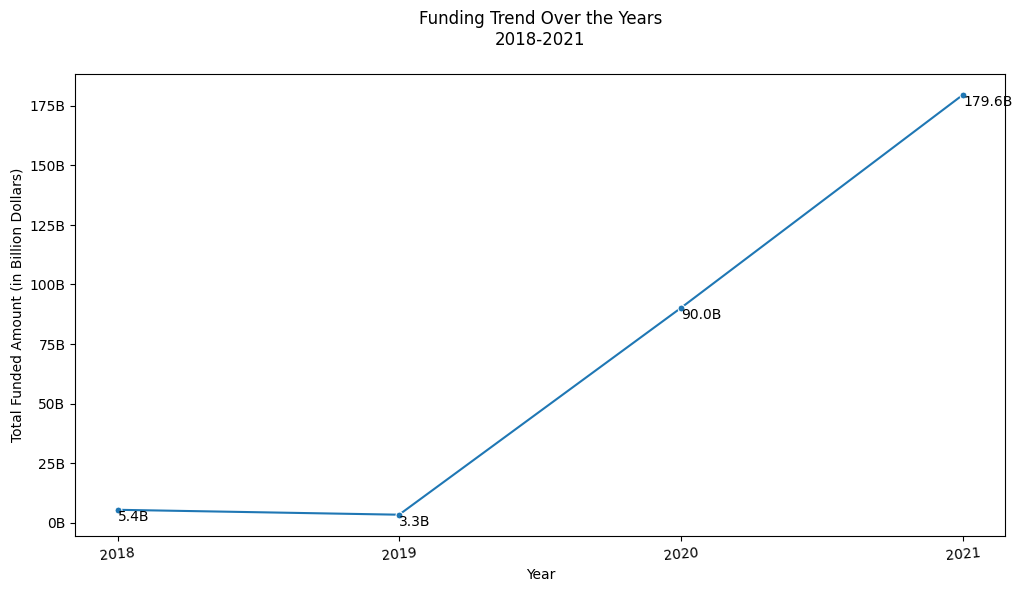

In [93]:
# Plot a line graph to display the trend over the year
funding_trend = df.groupby('year')['amount'].sum()
funding_trend = pd.DataFrame(funding_trend).reset_index()
funding_trend = funding_trend.reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=funding_trend, x='year', marker='o',markersize=5, y='amount',)
plt.title('Funding Trend Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount (in Billion Dollars)')
plt.xticks(rotation=5)
ax.xaxis.set_major_locator(YearLocator())
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,}'.format(int(x))))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
for i, label in enumerate(funding_trend['amount']):
    year = funding_trend['year'].iloc[i]
    y_value = funding_trend['amount'].iloc[i]
    label_text = f'{label / 1e9:.1f}B' if not pd.isna(label) else 'N/A'
    plt.text(year, y_value, label_text, ha='left', va='top', color='black', fontsize=10)
plt.show()

### **Observations**  
- There was a modest decline in funding amounts between 2018 and 2019. However, from 2019 to 2021, there was a remarkable and abrupt increase, with a substantial difference of over 176 billion between the funding levels in 2019 and 2021. 
- 2021 is by far the best funded year with over 179B in funding

### **1.2 Evolution of Funding Trends Across Top Locations Over the Years**

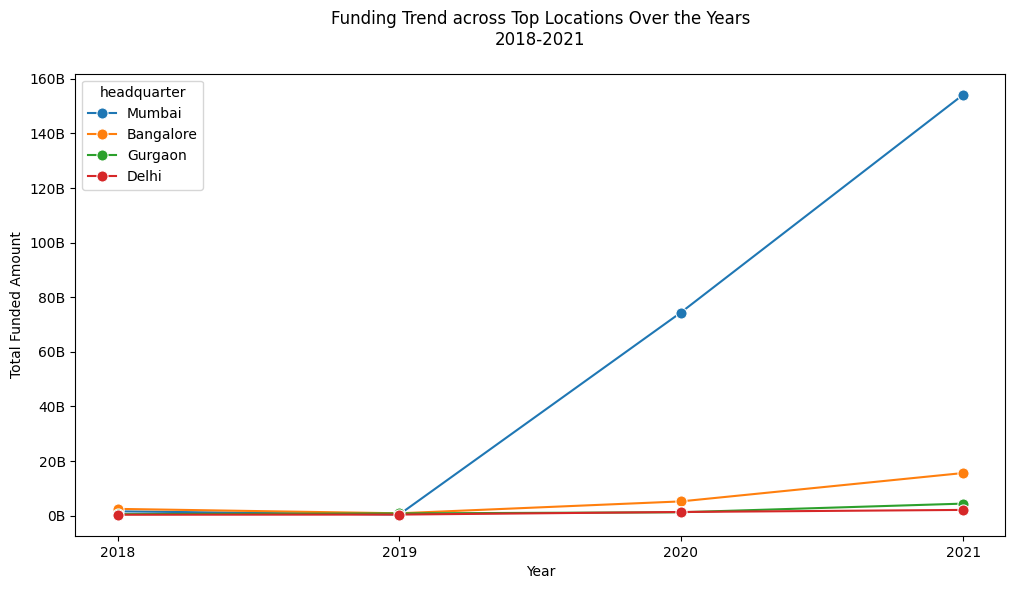

In [94]:
# plot a line graph for the top four funded locations
df['year'] = pd.to_datetime(df['year'], format='%Y')
location_trend = df.groupby(['headquarter', 'year'])['amount'].sum().sort_values(ascending=False)
top_locations = location_trend.groupby('headquarter').sum().nlargest(4).index
# Filter the original DataFrame for the top 5 locations
location_trend_top4 = location_trend[location_trend.index.get_level_values('headquarter').isin(top_locations)].reset_index()
location_trend_top4_reset = location_trend_top4.reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=location_trend_top4_reset, x='year', y='amount', hue='headquarter', marker='o', markersize=8)
plt.title('Funding Trend across Top Locations Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
ax.xaxis.set_major_locator(YearLocator())
plt.show()

### **Observations**  
- Mumbai stands out as the most well-funded location, exhibiting a funding trend that closely mirrors the overall funding pattern. In contrast, Bangalore, Gurgaon, Delhi and all other cities follow at a considerable distance.

### **1.3 Evolution of Funding Trends Across Top Sectors Over the Years**

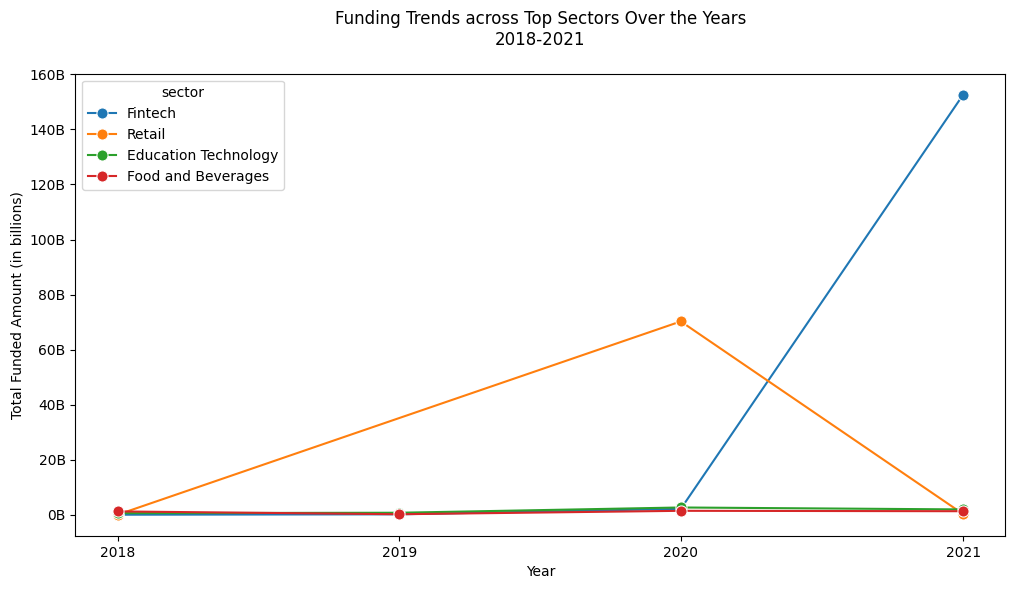

In [95]:
# Plot a line graph to visualize trend of funding across top top_sectors
df['year'] = pd.to_datetime(df['year'], format='%Y')
sector_trend = df.groupby(['sector', 'year'])['amount'].sum().sort_values(ascending=False)
top_sectors = sector_trend.groupby('sector').sum().nlargest(4).index
sector_trend_top4 = sector_trend[sector_trend.index.get_level_values('sector').isin(top_sectors)].reset_index()
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=sector_trend_top4, x='year', y='amount', hue='sector', marker='o', markersize=8)
plt.title('Funding Trends across Top Sectors Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount (in billions)')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
ax.xaxis.set_major_locator(YearLocator())
plt.show()

### **Observations**  
- Retail has undergone a notable evolution in its funding trend. Initially, it exhibited a steep upward trajectory until 2020, followed by a sudden decline between 2020 and 2021.

- In contrast, fintech consistently lagged significantly behind retail until 2020, only to experience a sudden upward trajectory thereafter, ultimately emerging as the best-funded sector.

### **1.4 Evolution of Funding Trends Across Startup Stages Over the Years**


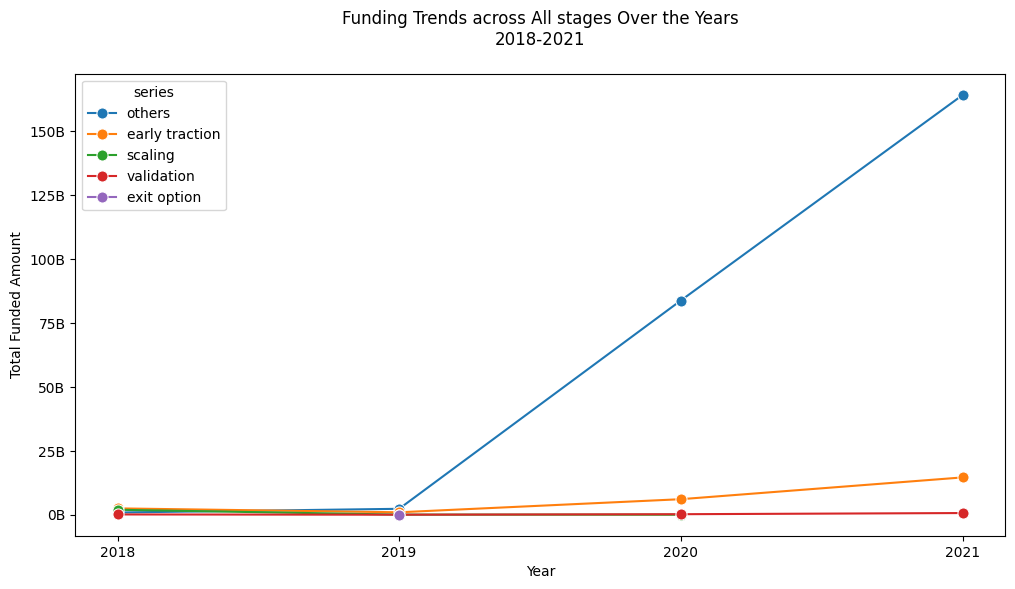

In [96]:
# plot a line graph for the top four funded series
df['year'] = pd.to_datetime(df['year'], format='%Y')
series_trend = df.groupby(['series', 'year'])['amount'].sum().sort_values(ascending=False)
top_series = series_trend.groupby('series').sum().index
# Filter the original DataFrame for the top 4 series
series_trend_top4 = series_trend[series_trend.index.get_level_values('series').isin(top_series)].reset_index()
series_trend_top4_reset = series_trend_top4.reset_index()
# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
ax = sns.lineplot(data=series_trend_top4_reset, x='year', y='amount', hue='series', marker='o', markersize=8)
plt.title('Funding Trends across All stages Over the Years\n2018-2021\n')
plt.xlabel('Year')
plt.ylabel('Total Funded Amount')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x / 1e9)}B'))
ax.xaxis.set_major_locator(YearLocator())
plt.show()

### **Observations**
- From the Graph above, Over the years, "Other" category which includes Private Equity, Corporate Round, Undisclosed, Non-equity Assistance, Debt, Bridge, and Edge has seen a tremendous growth in the amount of funding  received. These types of funding are often associated with more mature startups. As the startup ecosystem has matured, investors have become more comfortable investing in later-stage startups that are closer to profitability.

### **Conclusion**
**Startup Funding Trends**

Startup funding is experiencing a significant surge, especially in the financial technology (Fintech) sector. Among various locations, Mumbai stands out as the epicenter of this growth.

**Key Points:**
- **Rising Trends:** Startup funding is on a tremendous rise.
- **Location Spotlight:** Mumbai leads the charts as the location with the most substantial rise in startup funding.
- **Industry Focus:** Fintech emerges as the industry experiencing the most significant surge in funding.

## **2. What is the relationship between the amount of funding and the stage of the company?**

### **2.1 Total Funding Recieved in Different Stages**

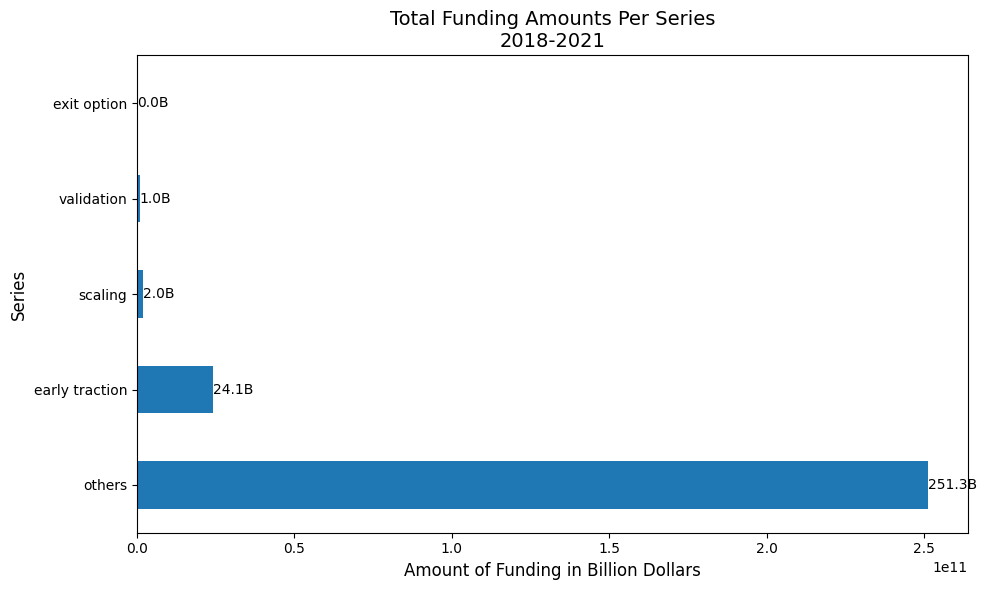

In [97]:
stage_funding_dist = df.groupby('series')['amount'].sum().sort_values(ascending=False)
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
stage_funding_dist.plot(kind='barh', ax=ax)
ax.set_title('Total Funding Amounts Per Series\n2018-2021', fontsize=14)
ax.set_xlabel('Amount of Funding in Billion Dollars', fontsize=12)
ax.set_ylabel('Series', fontsize=12)

# Annotate the bars
for i, (series, amount) in enumerate(stage_funding_dist.items()):
    ax.annotate(f'{amount / 1e9:.1f}B', xy=(amount, i), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### **Observations**  
- Category 'Others' being the best funded stage received 251B in total
- Exit option is the worst funded with about a Billion in funding  
- **A clear trend emerges – the more mature the startup, the more likely it is to attract substantial funding**

### **2.2 Average Funding Received in Different Stages**

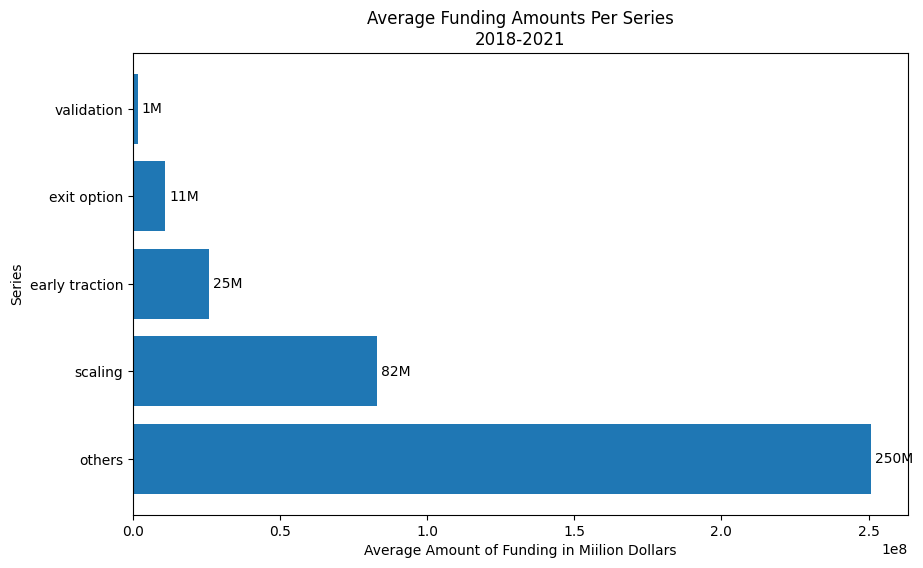

In [98]:
# Average funding received by startups in different stages
stage_funding_dist_avg = df.groupby('series')['amount'].mean().sort_values(ascending=False)
stage_funding_dist_avg = pd.DataFrame(stage_funding_dist_avg)

# Limiting the number of categories to plot
num_categories = 10  # You can adjust this value according to your preference
top_categories = stage_funding_dist_avg.head(num_categories)

plt.figure(figsize=(10, 6))  # Reduced figure size

# Plot horizontal bar chart
bars=plt.barh(top_categories.index, top_categories['amount'])

plt.title('Average Funding Amounts Per Series\n2018-2021')
plt.xlabel('Average Amount of Funding in Miilion Dollars')
plt.ylabel('Series')
for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{int(width / 1e6)}M',
                 xy=(width, bar.get_y() + bar.get_height() / 2),
                 xytext=(3, 0),  # 3 points horizontal offset
                 textcoords='offset points',
                 ha='left', va='center', fontsize=10)


plt.show()

### **Conclusion**
- We can comfortably infer that startups that are more muture get more funding on average

## **3. How does funding vary with the location of the start-ups**

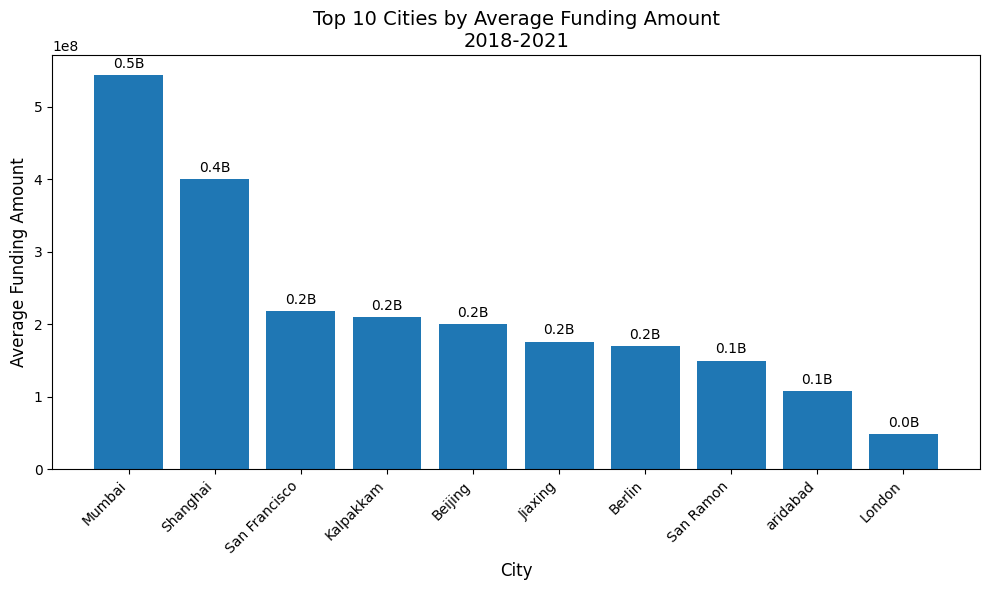

In [99]:
# Group by 'headquarter' and calculate the mean amount
location_funding = df.groupby('headquarter')['amount'].mean().reset_index()

# Sort by mean funding amount and select the top 10 cities
top_10_cities = location_funding.sort_values('amount', ascending=False).head(10)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_10_cities['headquarter'], top_10_cities['amount'])

# Add labels and title
plt.xlabel('City', fontsize=12)
plt.ylabel('Average Funding Amount', fontsize=12)
plt.title('Top 10 Cities by Average Funding Amount\n2018-2021', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the mean funding amount
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height / 1e9:.1f}B',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### **Observations**  
- Mumbai's startups get the most money on average. Shanghai gets less, quite a bit behind. It's like a funding showdown between the two cities.
- There's clear variation in funding across different cities. Mumbai, Shanghai, San Francisco, Kalpakkan, and Beijing startups are more likely to secure over $0.2 billion on average.

### **Conclusion**
- Startups located in Mumbai and San Francisco receive more funding on average than startups in other locations.


## **4. What are the most attractive sectors for investors?**

### **4.1 __Total Funding per Sector__**

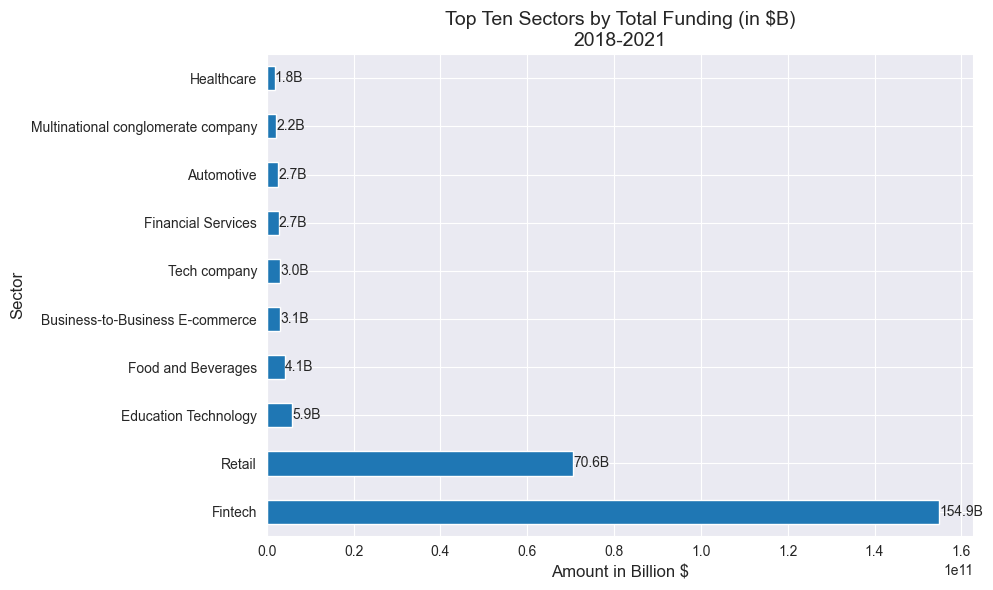

In [100]:
# Sort sectors by funding amount
sectors_by_funding = df.groupby('sector')['amount'].sum().sort_values(ascending=False)

# Select top ten sectors
top_ten_sectors_by_funding = sectors_by_funding.head(10)

# Set Seaborn style
sns.set_style("darkgrid")

# Plotting using Pandas
fig, ax = plt.subplots(figsize=(10, 6))
top_ten_sectors_by_funding.plot(kind='barh', ax=ax)
ax.set_title('Top Ten Sectors by Total Funding (in $B)\n2018-2021', fontsize=14)
ax.set_xlabel('Amount in Billion $', fontsize=12)
ax.set_ylabel('Sector', fontsize=12)

# Annotate the bars
for i, (sector, amount) in enumerate(top_ten_sectors_by_funding.items()):
    ax.annotate(f'{amount / 1e9:.1f}B', xy=(amount, i), ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### **Observations**
- Fintech and retail sectors stand out as the most attractive for investors.
- The two sectors have received the most funding over the year
- These sectors have received significant funding, making them key players in the startup investment landscape.

### **4.2 __Average Funding per Sector__**

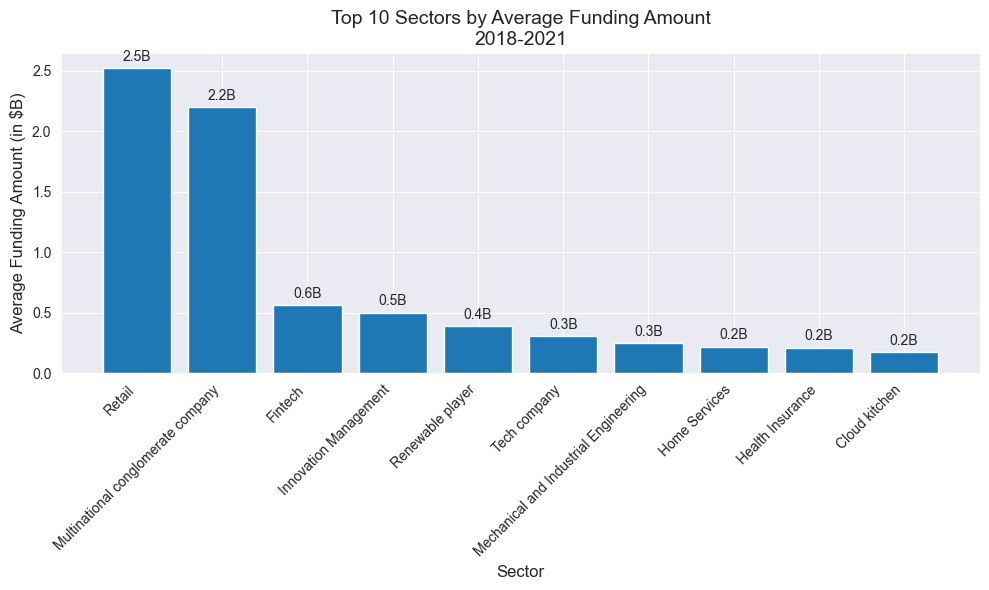

In [101]:
# Find the average funding amount for each sector
avg_sectors_funding = df.groupby('sector')['amount'].mean().reset_index()

# Convert the amount to billion dollars
avg_sectors_funding['amount_in_billion'] = avg_sectors_funding['amount'] / 1e9

# Sort sectors by average funding amount and select the top 10
top_ten_sectors = avg_sectors_funding.sort_values('amount_in_billion', ascending=False).head(10)

# Set Seaborn style
sns.set_style("darkgrid")

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(top_ten_sectors['sector'], top_ten_sectors['amount_in_billion'])

# Add labels and title
plt.xlabel('Sector', fontsize=12)
plt.ylabel('Average Funding Amount (in $B)', fontsize=12)
plt.title('Top 10 Sectors by Average Funding Amount\n2018-2021', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the average funding amount
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}B',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

### **Observations**

1. **Retail Dominance:**
   - On average, retail startups secured the highest funding from 2018 to 2021, indicating strong investor interest.

2. **Fintech Discrepancy:**
   - While fintech received the most funds in total, the average funding per startup was significantly lower at $0.55 billion. 
   - In contrast, retail startups averaged a substantial $2.4 billion, highlighting a considerable difference in individual funding amounts.

### **Conclusion**
   - The most attractive sectors for investors are Retail and Fintech

## **5. Does the location of the company influence its sector?**

In [102]:
# Get the top 7 sectors and top 7 locations based on total funding amount
top_sectors = df.groupby('sector')['amount'].sum().sort_values(ascending=False).head(7).index
top_locations = df.groupby('headquarter')['amount'].sum().sort_values(ascending=False).head(7).index

# Filter the DataFrame for the top 7 sectors and top 7 locations
df_top7 = df[df['sector'].isin(top_sectors) & df['headquarter'].isin(top_locations)]

# Create a heatmap
fig = px.density_heatmap(df_top7, 
                         x='headquarter', 
                         y='sector', 
                         title='Top 7 Sectors and Locations Heatmap \n2018-2021',
                         labels={'headquarter': 'Headquarter Location', 'sector': 'Sector'})
fig.show()

### **Observations**  
**Top Industries and Locations:**   

- Top industries exhibit a concentration in the leading locations.  Therefore, Location of a company does influences its sector

**Sectors Concentration:**  

- consistent pattern reveals a correlation between a sector's dominance and its prevalent location.  
This consistency suggests a nuanced influence of geography on flourishing industries.  

**Outliers Analysis:**  

- Instances of outliers are notable, such as in Bangalore where Fintech and Education Tech industries concentrate more.  

**Conclusion:**   

- The data strongly supports the notion that top industries tend to concentrate in the leading locations.

# **Summary and Recommendations**

### **Summary**
**Funding Trends**  
- Funding experienced a modest decline from 2018 to 2019, followed by a remarkable increase of over $176 billion from 2019 to 2021.
- 2021 stands out as the best-funded year, surpassing $179 billion.

**Geographical Dynamics**
- Mumbai is the most well-funded location, with other cities trailing at a considerable distance.
- Notable variations across cities, with Mumbai, Shanghai, San Francisco, Kalpakkan, and Beijing leading.

**Sector-Specific Insights**
- Retail and fintech sectors attract the most funding, with 'Others' (Private Equity, Corporate Round, Debt) showing substantial growth.

**Key Players**
- Silver Lake and Mubadala Investment Company lead all investors, contributing a massive $70 billion.

### **Recommendations**  
1. **Location Consideration:**  
   - Investors should focus on top-funded locations like Mumbai, Shanghai, San Francisco, Kalpakkan, and Beijing.  
   
2. **Sector-Specific Investments:**  
   - Explore opportunities in fintech and retail, the most attractive sectors for investors.  
   
3. **Emerging Trends:**  
   - Monitor trends in mature startups in the 'Others' category, signaling investor comfort with later-stage ventures.  
   
4. **Diversification:**  
   - Diversify portfolios across locations and sectors for a balanced risk-return profile.  